<a href="https://colab.research.google.com/github/rikachan19/deeplearning/blob/main/tugas4/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow --quiet

import torch
print(f"GPU Active: {torch.cuda.is_available()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AqKwHCPAwTS6Vj3L3T3Q")
project = rf.workspace("sampan-the-goat").project("tugas4_dl")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tugas4_DL-1 in yolov11:: 100%|██████████| 1176/1176 [00:00<00:00, 3539.06it/s]


In [3]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

# Training
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=180
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.8MB/s]


Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tugas4_DL-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=180, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256, 64, 1, False]           
 17                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1     86720  ultralytics.nn.modules.block.C3k2            [192, 128, 1, False]          
 20                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/Tugas4_DL-1/train/labels... 407 images, 1 backgrounds, 0 corrupt: 100%|██████████| 407/407 [00:00<00:00, 2406.90it/s]

train: New cache created: /content/Tugas4_DL-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 463. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 398.1±102.9 MB/s, size: 38.8 KB)


val: Scanning /content/Tugas4_DL-1/valid/labels... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<00:00, 1758.40it/s]

val: New cache created: /content/Tugas4_DL-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 141. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 180 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/180      2.29G      1.106      3.228      1.491         14        640: 100%|██████████| 26/26 [00:10<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        117        141    0.00711      0.971      0.291      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/180      2.69G      1.199      2.635      1.565         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]


                   all        117        141    0.00594       0.95      0.375      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/180      2.71G      1.231      2.284       1.56         16        640: 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]


                   all        117        141      0.617      0.167       0.27      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/180      2.72G      1.284      2.171      1.629         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        117        141      0.395      0.338      0.296      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/180      2.74G      1.319      2.037      1.587         20        640: 100%|██████████| 26/26 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        117        141       0.34      0.332      0.208      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/180      2.75G      1.284       2.06      1.632         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        117        141      0.353      0.449      0.314      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/180      2.76G      1.317          2      1.603         25        640: 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]


                   all        117        141      0.354      0.438      0.314      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/180      2.78G      1.256      1.901      1.593         13        640: 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        117        141      0.414       0.47      0.438      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/180      2.79G      1.294      1.862      1.607         21        640: 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        117        141      0.524      0.329      0.334      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/180      2.81G      1.333      1.797      1.653         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]


                   all        117        141       0.63      0.301      0.369      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/180      2.82G      1.259      1.672      1.562         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


                   all        117        141      0.624      0.555      0.587      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/180      2.84G      1.237       1.62      1.558         15        640: 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        117        141       0.64      0.471      0.518      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/180      2.85G      1.248       1.59      1.589         26        640: 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]


                   all        117        141       0.48      0.617      0.543      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/180      2.87G      1.131      1.438      1.485         25        640: 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        117        141      0.597      0.571      0.532      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/180      2.88G      1.187      1.455       1.52         17        640: 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        117        141      0.752      0.414       0.56      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/180       2.9G      1.178      1.476      1.507         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        117        141      0.577      0.553      0.579      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/180      2.91G      1.175      1.427      1.501         18        640: 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        117        141      0.742       0.54      0.585      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/180      2.93G      1.147      1.393      1.468         14        640: 100%|██████████| 26/26 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]


                   all        117        141      0.646      0.599      0.604      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/180      2.94G      1.168      1.365      1.523         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        117        141      0.629      0.543      0.565      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/180      2.96G      1.171      1.439      1.516         18        640: 100%|██████████| 26/26 [00:06<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        117        141      0.674       0.55      0.587      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/180      2.97G      1.091      1.358      1.455         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        117        141      0.605      0.538      0.586      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/180      2.99G      1.108      1.295      1.449         24        640: 100%|██████████| 26/26 [00:07<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        117        141      0.674      0.656      0.696      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/180         3G      1.142       1.33      1.476         19        640: 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        117        141      0.729      0.637       0.69      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/180      3.01G      1.097      1.263      1.444         20        640: 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        117        141      0.507      0.569      0.555      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/180      3.03G      1.093      1.207      1.443         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        117        141      0.681      0.612       0.62      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/180      3.05G      1.063      1.188      1.437         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        117        141      0.578      0.591      0.601      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/180      3.06G       1.13      1.267      1.449         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        117        141      0.718      0.648      0.714      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/180      3.07G      1.085       1.15      1.412         22        640: 100%|██████████| 26/26 [00:07<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        117        141      0.541      0.594      0.628      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/180      3.09G      1.059      1.161      1.426         13        640: 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        117        141       0.79      0.705      0.762      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/180      3.11G      1.117      1.159      1.473         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        117        141      0.698      0.616      0.704      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/180      3.12G      1.085      1.182      1.456         13        640: 100%|██████████| 26/26 [00:06<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        117        141      0.725      0.627      0.706      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/180      3.13G      1.095      1.149      1.439         19        640: 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        117        141      0.714       0.62      0.681      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/180      3.15G      1.055      1.134       1.43         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        117        141      0.638      0.686      0.653       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/180      3.16G      1.011      1.061      1.375         13        640: 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        117        141      0.667      0.634      0.676      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/180      3.18G      1.063      1.121      1.422         23        640: 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        117        141      0.662      0.629       0.67      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/180      3.19G      1.059      1.092      1.407         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        117        141      0.617      0.629      0.677      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/180      3.21G      1.073      1.068      1.418         16        640: 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        117        141      0.703       0.72      0.775      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/180      3.22G      1.066      1.048      1.418         21        640: 100%|██████████| 26/26 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        117        141      0.794      0.711      0.771      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/180      3.24G     0.9912     0.9961      1.358         22        640: 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        117        141      0.751      0.748      0.775      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/180      3.25G      1.007      1.008      1.363         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        117        141      0.747      0.764      0.767      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/180      3.27G     0.9765     0.9776      1.362         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        117        141      0.762       0.69      0.741      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/180      3.28G      1.061       1.01      1.426         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        117        141       0.83      0.768      0.827      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/180      3.29G     0.9981       1.01      1.344         23        640: 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        117        141      0.789      0.742      0.775       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/180      3.31G     0.9972     0.9562      1.355         23        640: 100%|██████████| 26/26 [00:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        117        141      0.661      0.743      0.759      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/180      3.33G       0.96     0.9676      1.342         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        117        141      0.714      0.755      0.773      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/180      3.34G     0.9502     0.9256      1.332         22        640: 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        117        141      0.666      0.665      0.703      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/180      3.36G     0.9594     0.9469      1.335         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        117        141      0.818      0.728      0.797      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/180      3.37G      0.941     0.9035      1.328         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        117        141      0.552      0.576      0.553      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/180      3.39G     0.9625      0.973      1.333         19        640: 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        117        141      0.673      0.594       0.61      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/180       3.4G     0.9723      0.921      1.355         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        117        141      0.785      0.663      0.745       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/180      3.41G     0.9772     0.9389      1.332         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        117        141      0.824      0.762      0.813      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/180      3.43G     0.9461     0.8849      1.314         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        117        141      0.795      0.731       0.79      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/180      3.44G     0.9446     0.8313      1.293         28        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        117        141      0.839      0.747      0.811      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/180      3.46G     0.9442      0.913      1.317         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        117        141       0.84       0.75       0.82      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/180      3.47G     0.9217     0.8303      1.294         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        117        141      0.802      0.766      0.806      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/180      3.49G     0.9359     0.8696      1.321         17        640: 100%|██████████| 26/26 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]


                   all        117        141       0.82      0.705      0.768      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/180      3.51G     0.9052     0.8181      1.297         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        117        141      0.765      0.669      0.701      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/180      3.52G     0.9253     0.8668      1.294         15        640: 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all        117        141      0.764      0.708      0.767      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/180      3.53G     0.9362     0.7955      1.311         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        117        141      0.735      0.768      0.799      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/180      3.55G     0.9418     0.8349      1.323         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


                   all        117        141      0.646       0.68      0.629      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/180      3.56G     0.9413     0.8444      1.292         18        640: 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        117        141      0.698      0.724      0.749      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/180      3.58G     0.9095      0.819      1.304         26        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        117        141      0.744      0.703      0.742      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/180      3.59G     0.8733     0.7982      1.284         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        117        141      0.765      0.755      0.793      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/180      3.61G      0.913     0.8227      1.286         13        640: 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        117        141      0.904      0.723      0.811      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/180      3.62G     0.8686     0.7759      1.292         11        640: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        117        141      0.781      0.728      0.777      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/180      3.64G     0.8784     0.7785      1.281         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        117        141      0.892      0.738      0.799      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/180      3.65G     0.8672     0.8254       1.29         21        640: 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        117        141      0.854      0.775      0.835      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/180      3.67G     0.8844     0.7973      1.283         19        640: 100%|██████████| 26/26 [00:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        117        141      0.825      0.717      0.792      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/180      3.68G     0.8403     0.7506      1.252         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        117        141      0.843      0.777      0.829      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/180       3.7G     0.8492     0.7392      1.249         12        640: 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        117        141      0.806      0.759      0.794      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/180      3.71G      0.849     0.7292      1.246         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

                   all        117        141      0.822      0.768      0.814      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/180      3.73G      0.851     0.7449      1.257         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]


                   all        117        141      0.833      0.788       0.83       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/180      3.74G      0.877     0.7605      1.288         21        640: 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]


                   all        117        141      0.738      0.765      0.779      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/180      3.76G     0.9037     0.7834      1.293         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        117        141      0.804      0.766      0.788      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/180      3.77G     0.8535     0.7491      1.272         20        640: 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


                   all        117        141      0.873      0.764      0.828      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/180      3.79G     0.8454     0.7533      1.261         14        640: 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        117        141      0.776      0.785      0.819      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/180       3.8G     0.8532     0.7251       1.25         20        640: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        117        141      0.887      0.758      0.832       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/180      3.82G      0.833     0.7304      1.249         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        117        141      0.845       0.75      0.843      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/180      3.83G     0.8551     0.7504      1.278         12        640: 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        117        141      0.801      0.772      0.825      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/180      3.84G     0.8214     0.7103      1.228         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        117        141      0.811      0.774       0.82      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/180      3.86G     0.8385     0.7315      1.241         26        640: 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        117        141      0.838      0.779      0.846      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/180      3.87G     0.8339     0.7097      1.245         25        640: 100%|██████████| 26/26 [00:06<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]


                   all        117        141      0.777      0.749      0.803      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/180      3.89G     0.8328     0.7211       1.24         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        117        141      0.846      0.796      0.857      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/180       3.9G     0.8431     0.6946      1.223         13        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

                   all        117        141      0.768       0.81      0.815      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/180      3.92G     0.8039     0.6928      1.236         10        640: 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        117        141       0.83      0.713      0.765      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/180      3.94G     0.7979     0.6703      1.212         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        117        141      0.869      0.773       0.84      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/180      3.95G     0.8538     0.7144      1.242         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        117        141      0.825      0.801       0.84      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/180      3.96G     0.8055     0.6828      1.223         20        640: 100%|██████████| 26/26 [00:06<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        117        141      0.864      0.798      0.841       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/180      3.98G     0.8374      0.709      1.233         25        640: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        117        141      0.805      0.795      0.837      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/180      3.99G     0.8211     0.6829      1.249         22        640: 100%|██████████| 26/26 [00:08<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]


                   all        117        141       0.87      0.748      0.833       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/180      4.01G     0.8092     0.6897      1.215         16        640: 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        117        141       0.86      0.796      0.858      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/180      4.02G     0.7821     0.6541      1.211         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        117        141      0.844      0.787      0.841      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/180      4.04G     0.7855      0.652        1.2         27        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        117        141      0.888       0.79       0.83      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/180      4.05G     0.7442     0.6531      1.192         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        117        141       0.86      0.756      0.827      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/180      4.07G     0.7503     0.6445      1.192         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        117        141      0.864      0.737      0.822      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/180      4.08G     0.7744     0.6369      1.192         24        640: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        117        141      0.855       0.78      0.834      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/180       4.1G     0.7588     0.6303      1.189         26        640: 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        117        141      0.858      0.795      0.823      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/180      4.11G     0.7919     0.6689       1.21         22        640: 100%|██████████| 26/26 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]


                   all        117        141      0.781      0.769      0.769      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/180      4.12G     0.7781     0.6395      1.194         22        640: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        117        141      0.834       0.79      0.837      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/180      4.14G       0.75     0.6179      1.197         11        640: 100%|██████████| 26/26 [00:06<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        117        141      0.846      0.782      0.851      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/180      4.16G     0.7628     0.6452      1.192         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        117        141      0.856       0.77      0.847      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/180      4.17G     0.7372     0.5962      1.185         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        117        141        0.9      0.781      0.848      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/180      4.19G     0.7757     0.6597      1.203         18        640: 100%|██████████| 26/26 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        117        141      0.836      0.754      0.824      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/180       4.2G     0.7748     0.6247       1.19         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        117        141      0.824      0.791      0.836      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/180      4.21G     0.7398     0.6003      1.181         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


                   all        117        141      0.803      0.801      0.831      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/180      4.23G     0.7336     0.6372       1.19         22        640: 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        117        141      0.826        0.8      0.825      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/180      4.25G      0.729     0.6264      1.191         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all        117        141      0.833      0.764       0.83      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/180      4.26G      0.742     0.5905      1.181         22        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        117        141      0.809      0.822      0.841      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/180      4.27G     0.7326     0.6091      1.179         17        640: 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        117        141      0.823       0.81      0.837      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/180      4.29G     0.7417     0.5946      1.182         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        117        141      0.875      0.787      0.828      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/180       4.3G     0.7129     0.5995       1.17         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        117        141      0.821      0.835      0.854      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/180      4.32G     0.7186     0.5953      1.186         16        640: 100%|██████████| 26/26 [00:06<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        117        141      0.855      0.808      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/180      4.33G     0.7115     0.5812      1.163         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        117        141      0.901       0.74       0.85      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/180      4.35G     0.7307     0.5938      1.166         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        117        141       0.72      0.767      0.763      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/180      4.36G     0.6943     0.5268      1.158         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        117        141      0.834      0.795      0.842      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/180      4.38G     0.7076     0.5914      1.148         16        640: 100%|██████████| 26/26 [00:06<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        117        141      0.842      0.805      0.817      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/180      4.39G     0.6906     0.5642      1.145         22        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        117        141      0.819      0.829      0.833      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/180      4.41G     0.6608     0.5411      1.116         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        117        141      0.857      0.826      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/180      4.42G     0.6438      0.553      1.114         13        640: 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        117        141      0.841      0.809      0.842      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/180      4.44G     0.6742     0.5332      1.129         20        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        117        141       0.86      0.784      0.839      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/180      4.45G     0.6744     0.5369      1.139         20        640: 100%|██████████| 26/26 [00:07<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        117        141      0.867      0.782      0.842      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/180      4.46G      0.681     0.5322      1.133         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        117        141      0.826      0.773       0.82      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/180      4.48G     0.6733     0.5522      1.133         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        117        141      0.867      0.785      0.848      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/180       4.5G     0.6593     0.5355      1.138         12        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        117        141      0.866      0.807      0.863      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/180      4.51G     0.6691     0.5316      1.131         20        640: 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]


                   all        117        141      0.844      0.832       0.86      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/180      4.53G     0.6534     0.5264      1.128         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        117        141      0.878      0.781       0.84      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/180      4.54G     0.6654     0.5351      1.132         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        117        141      0.863      0.824       0.86      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/180      4.56G     0.6424     0.5264       1.13         20        640: 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        117        141      0.872      0.859      0.884      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/180      4.57G     0.6699     0.5574      1.138         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all        117        141      0.889      0.829      0.878      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/180      4.59G     0.6517     0.5309      1.127         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        117        141      0.881      0.801      0.856      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/180       4.6G     0.6277     0.5127      1.118         21        640: 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]


                   all        117        141      0.859      0.827      0.855      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/180      4.61G     0.6327     0.5039      1.116         20        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        117        141      0.837      0.811      0.836      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/180      4.63G     0.6492     0.5264      1.132         21        640: 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        117        141       0.83      0.817      0.841      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/180      4.64G     0.6406     0.5289       1.12         21        640: 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        117        141      0.895      0.783      0.867      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/180      4.66G     0.6136     0.4803      1.088         22        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]


                   all        117        141      0.825      0.834      0.865        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/180      4.67G     0.6294     0.5082      1.123         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        117        141      0.853       0.81      0.848      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/180      4.69G     0.6185     0.4859      1.109         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        117        141      0.838      0.855      0.867      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/180      4.71G     0.6013     0.4655      1.094         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]


                   all        117        141      0.908      0.792       0.87      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/180      4.72G     0.6004     0.4629      1.089         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        117        141       0.84      0.851      0.866      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/180      4.73G     0.6037     0.4955      1.082         20        640: 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        117        141      0.826      0.865      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/180      4.75G     0.6383     0.4783      1.107         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        117        141      0.896      0.792      0.861      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/180      4.76G     0.6278     0.5272      1.114         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        117        141      0.891      0.796      0.854      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/180      4.78G     0.6041     0.4971      1.097         13        640: 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        117        141      0.863      0.808      0.859       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/180      4.79G     0.5982     0.4926      1.097         11        640: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        117        141      0.831       0.84      0.848      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/180      4.81G     0.5928     0.4675      1.102         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        117        141      0.867      0.831      0.865      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/180      4.82G     0.6036     0.5024      1.076         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]


                   all        117        141      0.859      0.843       0.87      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/180      4.84G     0.6035     0.4762      1.091         23        640: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        117        141       0.88      0.848      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/180      4.85G     0.6072      0.487      1.107         12        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]


                   all        117        141      0.894      0.812      0.861      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/180      4.87G     0.6097     0.4848      1.091         24        640: 100%|██████████| 26/26 [00:06<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all        117        141      0.891      0.829      0.873      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/180      4.88G      0.598     0.4846      1.095         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        117        141      0.872      0.806      0.873      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/180      4.89G      0.614     0.4852        1.1         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all        117        141      0.865      0.812      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/180      4.91G     0.5743     0.4554      1.081          9        640: 100%|██████████| 26/26 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        117        141      0.879      0.815      0.865      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/180      4.92G      0.575     0.4562       1.08         23        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        117        141      0.868      0.841      0.864        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/180      4.94G     0.5615     0.4665      1.061         23        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        117        141      0.901      0.836      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/180      4.96G     0.5638     0.4501      1.062         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        117        141      0.847      0.849      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/180      4.97G     0.5667      0.482      1.057         24        640: 100%|██████████| 26/26 [00:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]


                   all        117        141      0.877      0.823      0.871      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/180      4.99G     0.5549     0.4414      1.067         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        117        141      0.851      0.851      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/180         5G     0.5853     0.4721      1.092         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        117        141      0.873      0.806      0.861      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/180      5.02G     0.5798     0.4603      1.082         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        117        141      0.879      0.807      0.866      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/180      5.03G     0.5534     0.4476      1.069         26        640: 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]


                   all        117        141       0.88      0.822      0.865      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/180      5.04G     0.5464     0.4472      1.071         11        640: 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        117        141       0.89      0.814      0.858      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/180      5.06G     0.5263     0.4128      1.066         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]


                   all        117        141      0.869      0.828      0.856      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/180      5.07G     0.5495     0.4351      1.059         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        117        141      0.907      0.809      0.882      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/180      5.09G     0.5467     0.4295      1.056         18        640: 100%|██████████| 26/26 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        117        141      0.855      0.838       0.87      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/180       5.1G      0.534     0.4237      1.061         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        117        141       0.88       0.82      0.867      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/180      5.12G     0.5294     0.4328      1.057         13        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        117        141      0.854      0.843      0.866      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/180      5.13G     0.5233     0.4131      1.042         12        640: 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        117        141      0.876      0.829      0.869      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/180      5.15G     0.5618     0.4574      1.086         20        640: 100%|██████████| 26/26 [00:07<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        117        141      0.868      0.845      0.872      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/180      5.16G     0.5204     0.4228      1.043         21        640: 100%|██████████| 26/26 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]


                   all        117        141      0.854      0.857      0.868      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/180      5.18G     0.5148     0.4049      1.034         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        117        141      0.851      0.853      0.869      0.609


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/180      5.19G     0.4388     0.3837      1.034          8        640: 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]


                   all        117        141      0.848      0.848      0.863      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/180      5.21G     0.4323      0.354      0.999          7        640: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        117        141      0.885      0.839      0.864      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/180      5.22G     0.4123     0.3387      1.002          7        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        117        141       0.87      0.836      0.859      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/180      5.24G     0.4029     0.3332      1.012          9        640: 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        117        141      0.878      0.837      0.864      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/180      5.25G     0.3978     0.3275      1.001          7        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        117        141      0.873      0.847      0.864      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/180      5.27G     0.3676     0.3013     0.9746          8        640: 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        117        141      0.879      0.849      0.861      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/180      5.28G     0.3934      0.306      1.007          8        640: 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        117        141      0.877      0.848      0.859      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/180      5.29G     0.3838     0.3031     0.9715          8        640: 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        117        141      0.861      0.848      0.865      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/180      5.31G     0.3808     0.3061     0.9918          9        640: 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        117        141      0.865      0.842       0.87      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/180      5.32G     0.3768     0.2965     0.9761          7        640: 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        117        141      0.872      0.838      0.869      0.615



180 epochs completed in 0.438 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


                   all        117        141      0.907      0.808      0.882      0.614
                  book         33         47      0.858      0.771      0.802      0.606
               gamepad         30         35      0.963      0.857      0.933       0.74
                   pen         27         32      0.889      0.748      0.831      0.434
            smartphone         27         27      0.921      0.858      0.961      0.676
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train


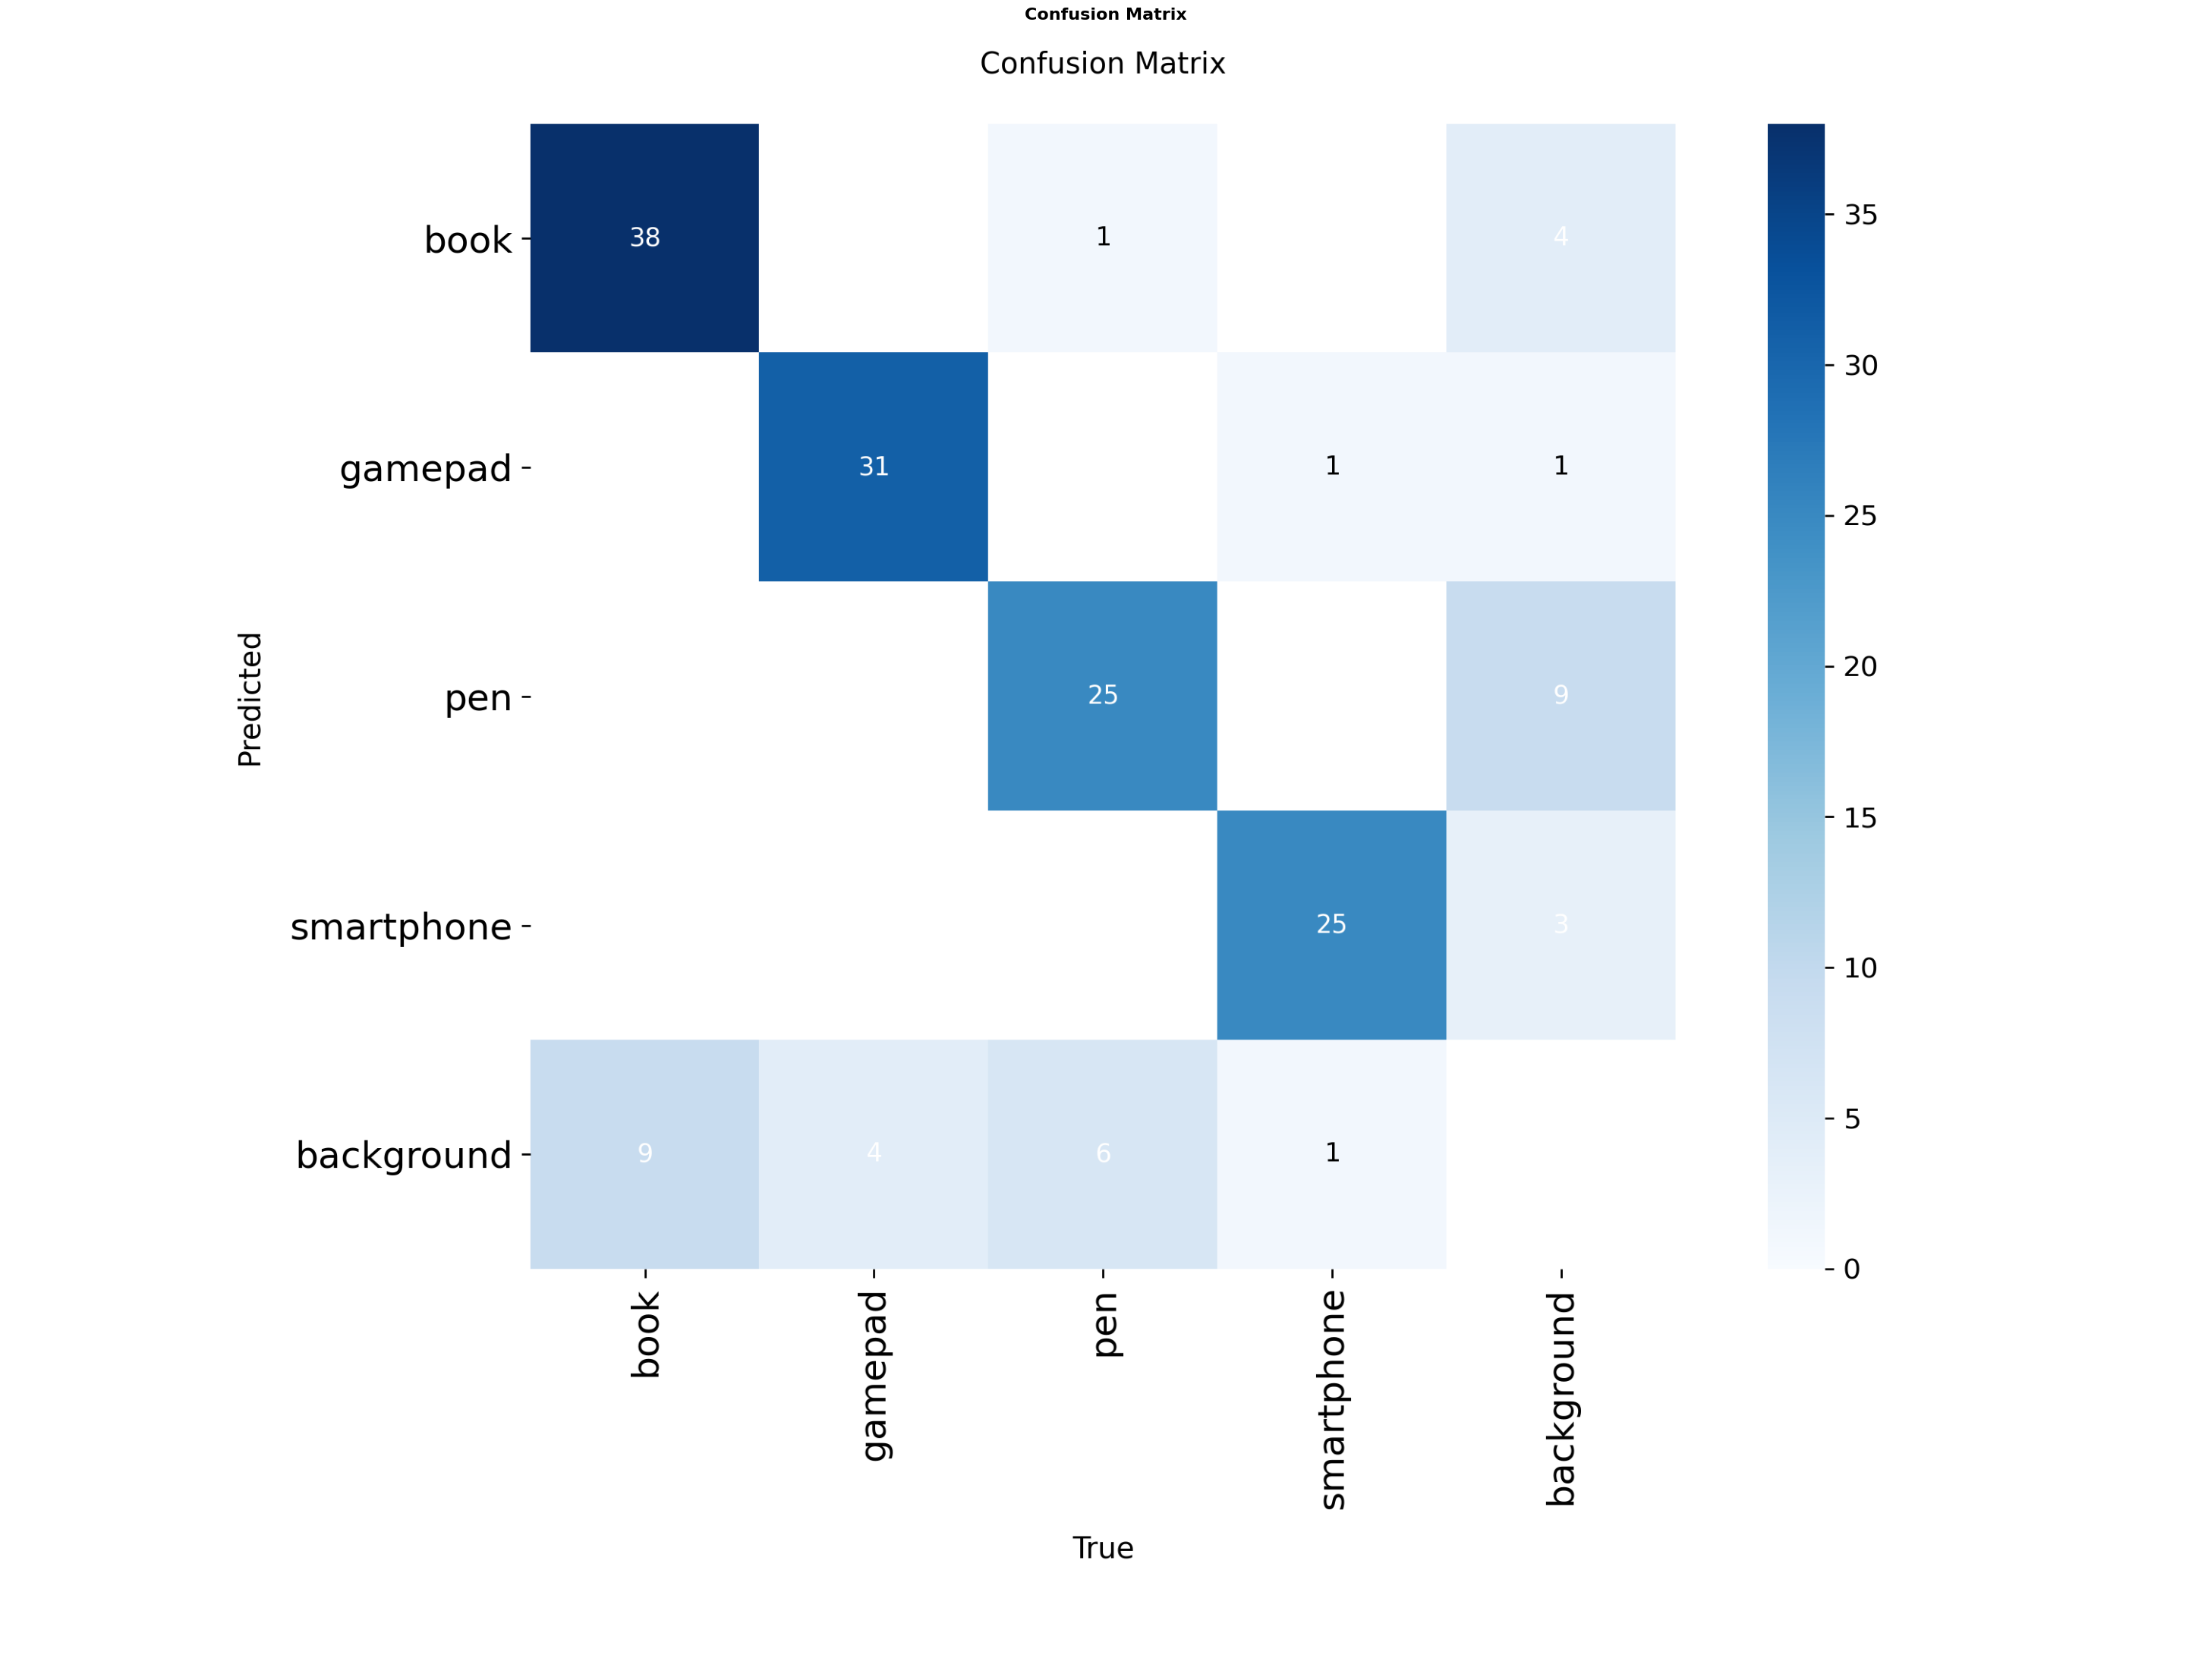

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Load image
img_path = "/content/runs/detect/train/confusion_matrix.png"
img = Image.open(img_path)

# Get image size
w, h = img.size
dpi = 100

# Plotting with better appearance
plt.figure(figsize=(w/dpi, h/dpi), dpi=dpi)
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.tight_layout(pad=2.0)
plt.show()

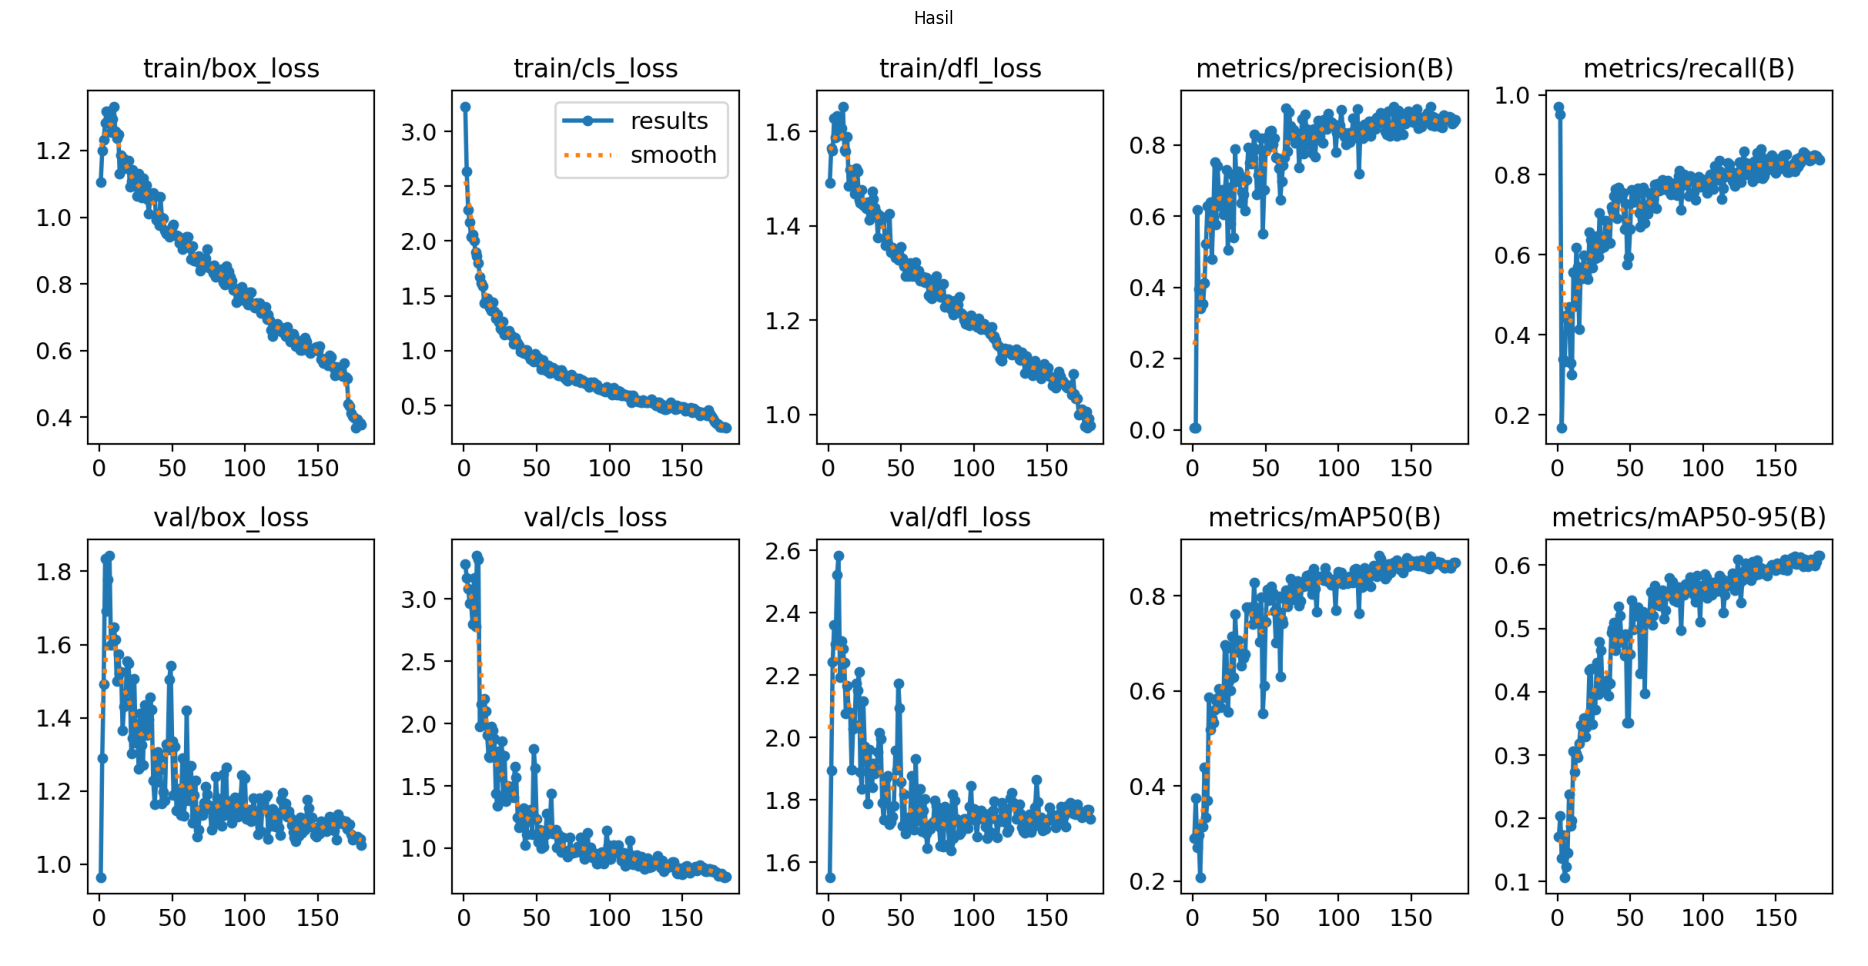

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/runs/detect/train/results.png"
img = Image.open(img_path)

w, h = img.size
dpi = 100

plt.figure(figsize=(w/dpi, h/dpi), dpi=dpi)
plt.imshow(img)
plt.axis('off')
plt.title("Hasil", fontsize=12)
plt.show()

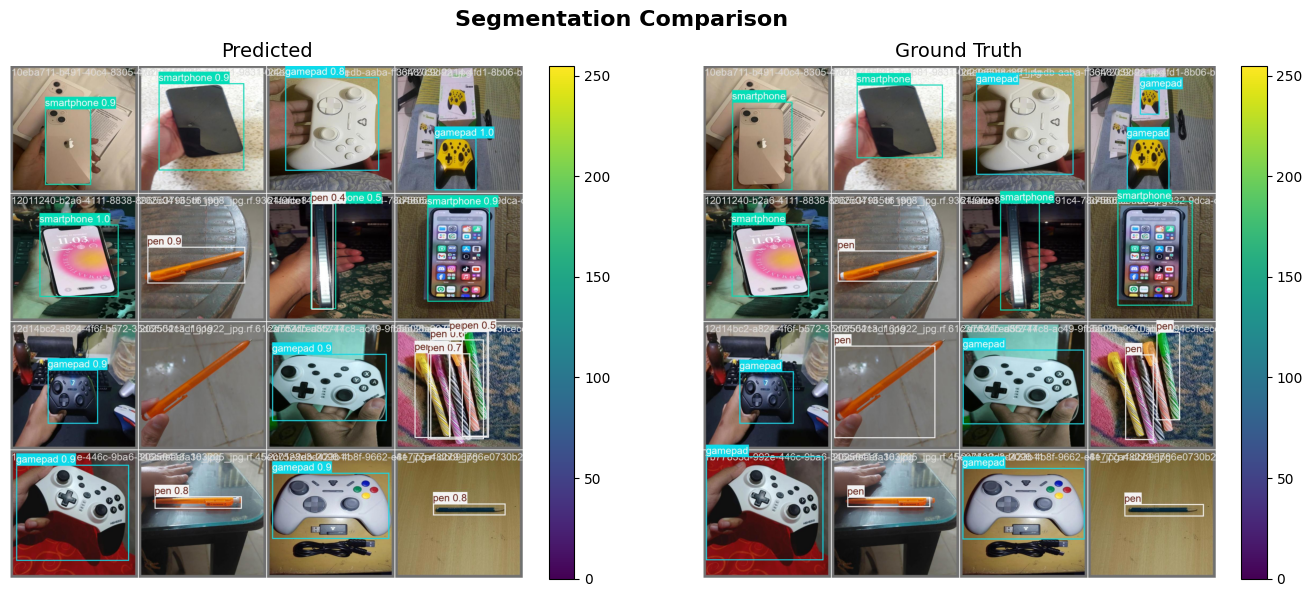

In [8]:
from PIL import Image

pred = Image.open("/content/runs/detect/train/val_batch0_pred.jpg")
labels = Image.open("/content/runs/detect/train/val_batch0_labels.jpg")

plt.figure(figsize=(14, 6))

#Predicted
plt.subplot(1, 2, 1)
plt.imshow(pred, cmap='viridis')
plt.axis('off')
plt.title("Predicted", fontsize=14)
plt.colorbar(fraction=0.046, pad=0.04)
#Ground Truth
plt.subplot(1, 2, 2)
plt.imshow(labels, cmap='viridis')
plt.axis('off')
plt.title("Ground Truth", fontsize=14)
plt.colorbar(fraction=0.046, pad=0.04)

plt.suptitle("Segmentation Comparison", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Silahkan upload gambar (ulang upload jika belum 10)...


Saving IMG_4828.JPG to IMG_4828 (1).JPG
Saving IMG_4829.JPG to IMG_4829 (1).JPG
Saving IMG_4830.JPG to IMG_4830 (1).JPG
Saving IMG_4831.JPG to IMG_4831 (1).JPG
Saving IMG_4834.JPG to IMG_4834 (1).JPG
Saving IMG_4835.JPG to IMG_4835 (1).JPG
Saving IMG_4836.JPG to IMG_4836 (1).JPG
Saving IMG_4837.JPG to IMG_4837 (1).JPG
Saving IMG_4839.JPG to IMG_4839.JPG
Saving IMG_4840.JPG to IMG_4840.JPG

 Sudah ada 10 gambar. Memproses...

 Memproses gambar 1/10: IMG_4828 (1).JPG

image 1/1 /content/IMG_4828 (1).JPG: 480x640 1 smartphone, 10.6ms
Speed: 3.5ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3

 Memproses gambar 2/10: IMG_4829 (1).JPG

image 1/1 /content/IMG_4829 (1).JPG: 640x480 1 book, 13.3ms
Speed: 4.6ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3

 Memproses gambar 3/10: IMG_4830 (1).JPG

image 1/1 /content/IMG_4830 (1).JPG: 640x480 1 

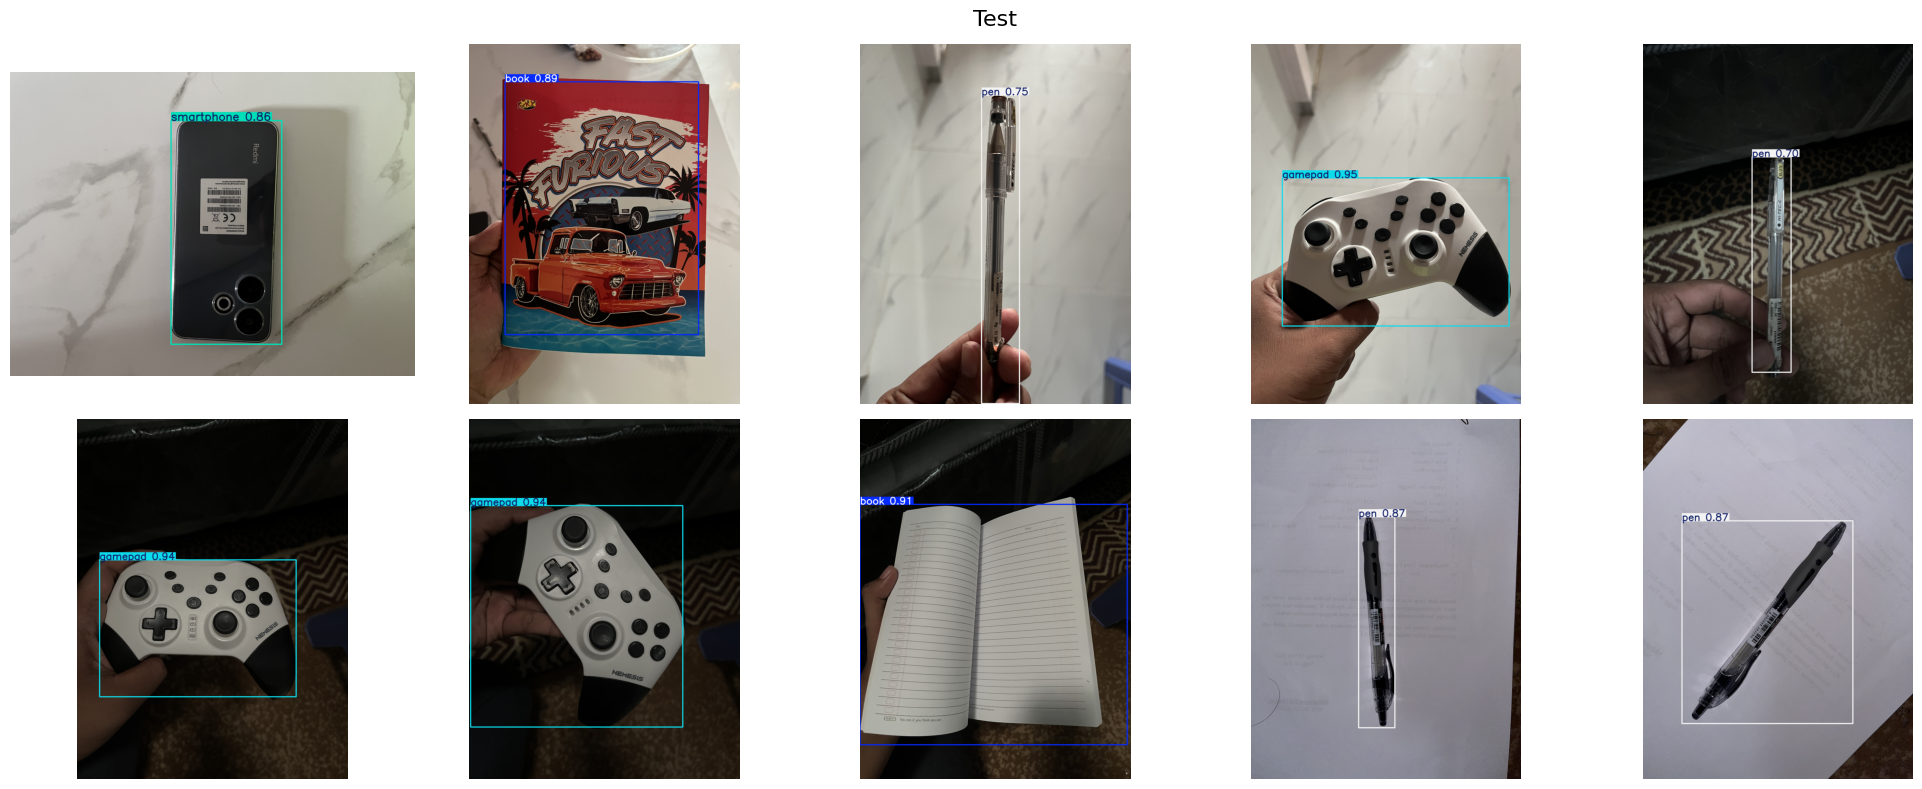


 Hasil Validasi (Tabel):


,Nama Gambar,Kelas,Confidence,Koordinat
0,IMG_4828 (1).JPG,smartphone,0.86,"[1603.8416748046875, 483.7306823730469, 2705.3..."
1,IMG_4829 (1).JPG,book,0.89,"[402.3296203613281, 423.0974426269531, 2561.32..."
2,IMG_4830 (1).JPG,pen,0.75,"[1356.137939453125, 572.1644897460938, 1779.68..."
3,IMG_4831 (1).JPG,gamepad,0.95,"[350.377685546875, 1499.791748046875, 2890.496..."
4,IMG_4834 (1).JPG,pen,0.70,"[1221.1998291015625, 1264.2664794921875, 1658...."
5,IMG_4835 (1).JPG,gamepad,0.94,"[252.0690155029297, 1584.6585693359375, 2445.6..."
6,IMG_4836 (1).JPG,gamepad,0.94,"[18.070777893066406, 978.1329956054688, 2385.7..."
7,IMG_4837 (1).JPG,book,0.91,"[0.0, 964.8312377929688, 2981.01708984375, 364..."
8,IMG_4839.JPG,pen,0.87,"[1205.0931396484375, 1103.7193603515625, 1611...."
9,IMG_4840.JPG,pen,0.87,"[436.90252685546875, 1148.3092041015625, 2350...."


In [10]:
from ultralytics import YOLO
from IPython.display import display, Image, HTML
import os
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np

if 'uploaded_images_total' not in globals():
    uploaded_images_total = []

print("Silahkan upload gambar (ulang upload jika belum 10)...")
uploaded = files.upload()

uploaded_images_total.extend(list(uploaded.keys()))

max_images = 10
if len(uploaded_images_total) < max_images:
    print(f" {len(uploaded_images_total)} gambar terkumpul. Menunggu {max_images - len(uploaded_images_total)} lagi...")
else:
    uploaded_images_total = uploaded_images_total[:max_images]
    print(f"\n Sudah ada {len(uploaded_images_total)} gambar. Memproses...")

    model = YOLO("/content/runs/detect/train/weights/best.pt")

    detection_data = []
    detected_images = []

    for i, img_path in enumerate(uploaded_images_total):
        print(f"\n Memproses gambar {i+1}/{len(uploaded_images_total)}: {img_path}")

        results = model.predict(
            source=img_path,
            conf=0.5,
            save=True,
            show_labels=True,
            show_conf=True,
            line_width=2
        )

        # Save the result
        for result in results:
            im_array = result.plot()
            im = PILImage.fromarray(im_array[..., ::-1])
            detected_images.append(im)

        for det in results[0].boxes:
            detection_data.append({
                "Nama Gambar": img_path,
                "Kelas": model.names[int(det.cls)],
                "Confidence": round(det.conf.item(), 2),
                "Koordinat": det.xyxy.tolist()[0]
            })

    # Show the result
    print("\n Hasil Deteksi (Test):")
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
    fig.suptitle('Test', fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(detected_images):
            ax.imshow(detected_images[i])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

    df = pd.DataFrame(detection_data)
    print("\n Hasil Validasi (Tabel):")
    display(df)

    uploaded_images_total = []

In [23]:
from ultralytics import YOLO
from google.colab import files
import cv2
import os

def predict_and_upload(video_path):
    """
    Melakukan prediksi pada video dan hanya menampilkan bounding box
    dengan confidence >= 0.5.

    Parameters:
    video_path (str): Path ke video input di Colab
    """

    model = YOLO("runs/detect/train/weights/best.pt")

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Tidak dapat membuka video!")
        return False

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    base_name = os.path.splitext(os.path.basename(video_path))[0]
    output_path = f"{base_name}_predicted_video.mp4"

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print("Memulai prediksi video.")

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        annotated_frame = frame.copy()

        boxes = results[0].boxes

        if boxes is not None and boxes.conf is not None:
            for box, conf, cls_id in zip(boxes.xyxy.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.cls.cpu().numpy()):
                if conf >= 0.6:
                    x1, y1, x2, y2 = box.astype(int)
                    class_name = model.names[int(cls_id)]
                    label = f"{class_name} {conf:.2f}"

                    # Gambar bounding box dan label
                    cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(annotated_frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                                0.5, (0, 255, 0), 2)

        out.write(annotated_frame)

        frame_count += 1
        if frame_count % 50 == 0:
            print(f"Sudah memproses {frame_count} frame.")

    cap.release()
    out.release()

    print("\nProses telah selesai!")
    print(f"Video telah disimpan sebagai: {output_path}")

    print("\nMengupload hasil.")
    files.download(output_path)

    return True

# Upload dan jalankan prediksi
print("Silakan upload video yang anda ingin prediksi:")
uploaded = files.upload()

if uploaded:
    video_name = next(iter(uploaded))
    print(f"\nMemproses video: {video_name}")

    success = predict_and_upload(video_name)

    if success:
        print("\nSUKSES! Video telah selesai diupload.")
    else:
        print("\nTidak berhasil memproses video.")
else:
    print("Tidak ada video yang diupload.")


Silakan upload video yang anda ingin prediksi:


Saving tes8.mp4 to tes8 (3).mp4

Memproses video: tes8 (3).mp4
Memulai prediksi video.

0: 640x384 1 book, 1 gamepad, 12.8ms
Speed: 2.6ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 book, 1 gamepad, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 book, 1 gamepad, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 book, 1 gamepad, 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 book, 1 gamepad, 8.4ms
Speed: 2.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 book, 1 gamepad, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 book, 1 gamepad, 8.6ms
Speed: 2.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at sha

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


SUKSES! Video telah selesai diupload.
